In [10]:
# This code is written to support the experiments in the book titled:
# "Adaptive Machine Learning Algorithms"
# by
# Chanchal Chatterjee and Vwani P. Roychowdhury
# August 2021
#
# Experiments for Chapter 3 - Adaptive Mean, Normalized Mean,  Median
#
# Author: Chanchal Chatterjee
#

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf


In [12]:
# Number of samples N and dimension D
nSamples = 1000
nDim     = 5 #10
nEpochs  = 1

In [13]:
m = np.array([10, 7, 6, 5, 1])
cov = np.array([ \
    [  2.091,  0.038, -0.053, -0.005,  0.010], \
    [  0.038,  1.373,  0.018, -0.028, -0.011], \
    [ -0.053,  0.018,  1.430,  0.017,  0.055], \
    [ -0.005, -0.028,  0.017,  1.084, -0.005], \
    [  0.010, -0.011,  0.055, -0.005,  1.071]])

In [14]:
# # Generate the covX random matrices
# m = np.array([10, 9, 8, 7, 6, 5, 4, 3, 2, 1])
# cov = 3*np.array([ \
# [ 0.4270,  0.0110, -0.0050, -0.0250,  0.0890, -0.0790, -0.0190,  0.0740,  0.0890,  0.0050], \
# [ 0.0110,  5.6900, -0.0690, -0.2820, -0.7310,  0.0900, -0.1240,  0.1000,  0.4320, -0.1030], \
# [-0.0050, -0.0690,  0.0800,  0.0980,  0.0450, -0.0410,  0.0230,  0.0220, -0.0350,  0.0120], \
# [-0.0250, -0.2820,  0.0980,  2.8000, -0.1070,  0.1500, -0.1930,  0.0950, -0.2260,  0.0460], \
# [ 0.0890, -0.7310,  0.0450, -0.1070,  3.4400,  0.2530,  0.2510,  0.3160,  0.0390, -0.0100], \
# [-0.0790,  0.0900, -0.0410,  0.1500,  0.2530,  2.2700, -0.1800,  0.2950, -0.0390, -0.1130], \
# [-0.0190, -0.1240,  0.0230, -0.1930,  0.2510, -0.1800,  0.3270,  0.0270,  0.0260, -0.0160], \
# [ 0.0740,  0.1000,  0.0220,  0.0950,  0.3160,  0.2950,  0.0270,  0.7270, -0.0960, -0.0170], \
# [ 0.0890,  0.4320, -0.0350, -0.2260,  0.0390, -0.0390,  0.0260, -0.0960,  0.7150, -0.0090], \
# [ 0.0050, -0.1030,  0.0120,  0.0460, -0.0100, -0.1130, -0.0160, -0.0170, -0.0090,  0.0650]])

# cov.shape

In [15]:
from scipy.linalg import eigh

eigvals, eigvecs = eigh(cov)
print("eigvals =\n", eigvals[::-1])

V = np.fliplr(eigvecs)
D  = np.diag(np.sqrt(eigvals[::-1]))
m = m.reshape(nDim,1)
np.random.seed(1)
R = np.random.normal(0, 1, (nDim, nSamples))
X = (V @ D @ R) + m
print(X.shape)

eigvals =
 [2.09714401 1.43977071 1.3697587  1.08392682 1.05839976]
(5, 1000)


In [16]:
# Compute Correlation matrix and eigen vectors of the generated data
from numpy import linalg as la
corX = (X @ X.T) / nSamples
MeanX = np.mean(X, axis=1).reshape(nDim,1)
NMeanX = MeanX / la.norm(MeanX)
NMeanX = NMeanX.reshape(nDim,1)
MedianX = np.median(X, axis=1).reshape(nDim,1)
print("MeanX=\n", MeanX)
print("NMeanX=\n", NMeanX)
print("MedianX=\n", MedianX)

MeanX=
 [[10.06105838]
 [ 6.98047044]
 [ 6.04521555]
 [ 4.97198199]
 [ 0.93862729]]
NMeanX=
 [[0.69083647]
 [0.47930977]
 [0.41509106]
 [0.34139813]
 [0.06445027]]
MedianX=
 [[10.03604461]
 [ 6.98552403]
 [ 6.03366976]
 [ 4.954362  ]
 [ 0.91403003]]


In [17]:
# Adaptive algorithm
from numpy import linalg as la

A  = np.zeros(shape=(nDim,nDim)) # stores adaptive correlation matrix
m  = np.zeros(shape=(nDim,1))
md = np.zeros(shape=(nDim,1))
w1 = np.zeros(shape=(nDim,1))
w2 = np.zeros(shape=(nDim,1))
w3 = np.zeros(shape=(nDim,1))
mu = 50

err1 = np.zeros(shape=(nSamples*nEpochs))
err2 = np.zeros(shape=(nSamples*nEpochs))
err3 = np.zeros(shape=(nSamples*nEpochs))
err4 = np.zeros(shape=(nSamples*nEpochs))
err5 = np.zeros(shape=(nSamples*nEpochs))
err6 = np.zeros(shape=(nSamples*nEpochs))

for epoch in range(nEpochs):
    for iter in range(nSamples):
        cnt = nSamples*epoch + iter
      
        x = X[:,iter]
        x = x.reshape(nDim,1)
        A = A + (1.0/(1 + cnt))*((np.dot(x, x.T)) - A)
        m  = m  + (1.0/(1 + cnt)) * (x - m)
        
        # Eq.2.13
        w1 = w1 + (1.0/(100+cnt))*(x - (w1.T @ x) * w1)
        # Eq.2.15
        w2 = w2 + (1.0/(100+cnt))*(2*x - (w2.T @ x) * w2 - (w2.T @ w2) * x)
        #Eq.2.17
        w3 = w3 + (1.0/(100+cnt))*(x - w3 - mu * w3 @ ((w3.T @ w3) - 1))
        #Eq.2.21
        md = md + (3.0/(1 + cnt)) * np.sign(x - md)

                                   
        err1[cnt] = la.norm(A - corX)
        err2[cnt] = la.norm(m - MeanX)
        err3[cnt] = la.norm(md - MedianX)
        err4[cnt] = la.norm(w1 - NMeanX)
        err5[cnt] = la.norm(w2 - NMeanX)
        err6[cnt] = la.norm(w3 - NMeanX)


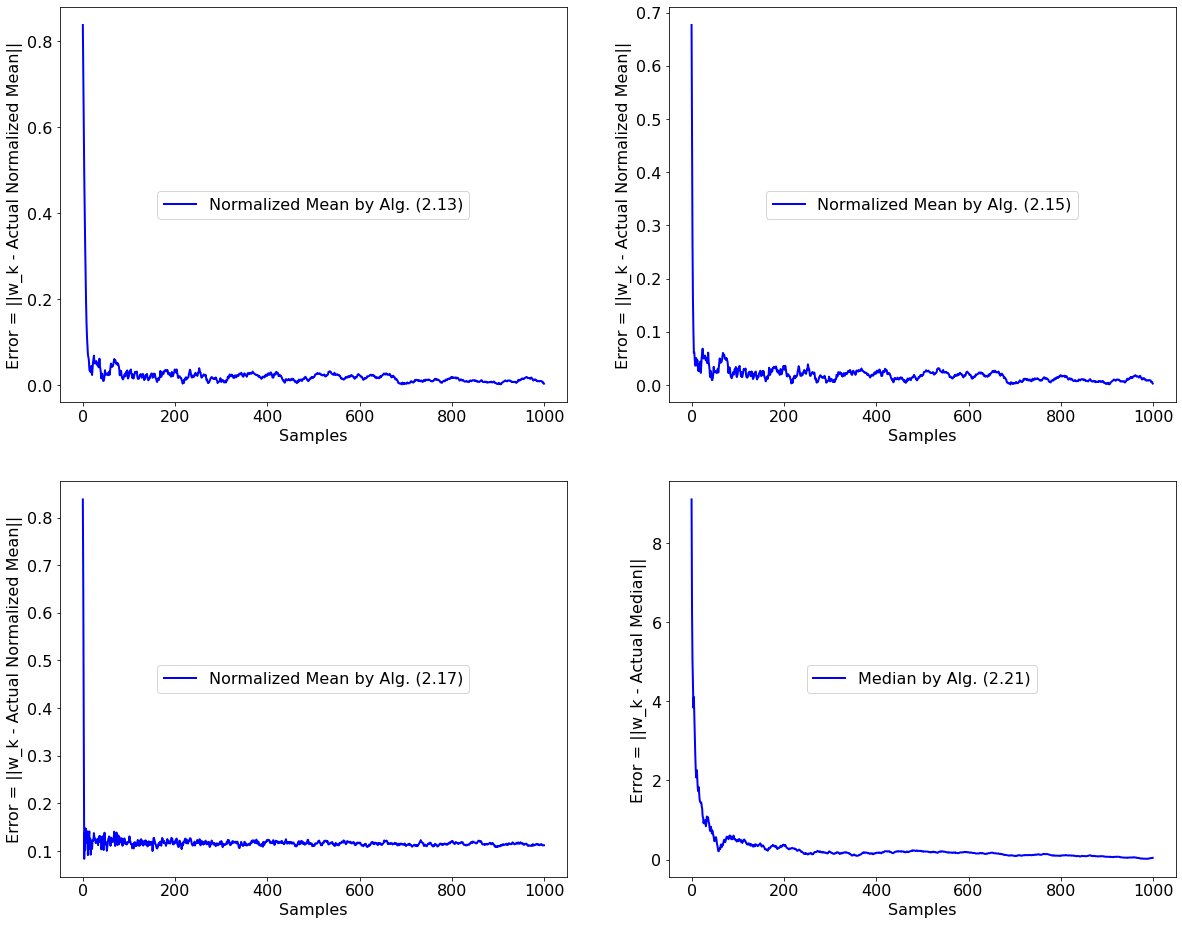

In [20]:
plt.figure(figsize=(20, 16))
plt.rcParams.update({'font.size': 16})

plt.subplot(2, 2, 1)
plt.plot(err4, lw=2, color='b', label="Normalized Mean by Alg. (2.13)")
plt.ylabel('Error = ||w_k - Actual Normalized Mean||')
plt.xlabel('Samples')
plt.legend(loc="center")

plt.subplot(2, 2, 2)
plt.plot(err5, lw=2, color='b', label="Normalized Mean by Alg. (2.15)")
plt.ylabel('Error = ||w_k - Actual Normalized Mean||')
plt.xlabel('Samples')
plt.legend(loc="center")

plt.subplot(2, 2, 3)
plt.plot(err6, lw=2, color='b', label="Normalized Mean by Alg. (2.17)")
plt.ylabel('Error = ||w_k - Actual Normalized Mean||')
plt.xlabel('Samples')
plt.legend(loc="center")

plt.subplot(2, 2, 4)
plt.plot(err3, lw=2, color='b', label="Median by Alg. (2.21)")
plt.ylabel('Error = ||w_k - Actual Median||')
plt.xlabel('Samples')
plt.legend(loc="center")

plt.show()